In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv")

In [3]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df.shape

(891, 12)

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
le= LabelEncoder()
list1=['Name','Sex','Ticket','Cabin','Embarked']
for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))

In [13]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,22.0,1,0,523,7.2500,147,2
1,2,1,1,190,0,38.0,1,0,596,71.2833,81,0
2,3,1,3,353,0,26.0,0,0,669,7.9250,147,2
3,4,1,1,272,0,35.0,1,0,49,53.1000,55,2
4,5,0,3,15,1,35.0,0,0,472,8.0500,147,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548,1,27.0,0,0,101,13.0000,147,2
887,888,1,1,303,0,19.0,0,0,14,30.0000,30,2
888,889,0,3,413,0,NaN,1,2,675,23.4500,147,2
889,890,1,1,81,1,26.0,0,0,8,30.0000,60,0


In [33]:
df.describe()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,445.000000,0.647587,29.699118,0.523008,0.381594,338.528620,32.204208,130.744108,1.538721
std,257.353842,0.486592,0.836071,257.353842,0.477990,14.526497,1.102743,0.806057,200.850657,49.693429,36.024237,0.794231
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,222.500000,0.000000,20.125000,0.000000,0.000000,158.500000,7.910400,147.000000,1.000000
50%,446.000000,0.000000,3.000000,445.000000,1.000000,28.000000,0.000000,0.000000,337.000000,14.454200,147.000000,2.000000
75%,668.500000,1.000000,3.000000,667.500000,1.000000,38.000000,1.000000,0.000000,519.500000,31.000000,147.000000,2.000000
max,891.000000,1.000000,3.000000,890.000000,1.000000,80.000000,8.000000,6.000000,680.000000,512.329200,147.000000,3.000000


In no. of colums std is high thats why the outliers are may be present


In [14]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [16]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
dtype: int64

In [17]:
import numpy as np
df1=df.replace(np.NaN,0)

In [18]:
df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,22.0,1,0,523,7.2500,147,2
1,2,1,1,190,0,38.0,1,0,596,71.2833,81,0
2,3,1,3,353,0,26.0,0,0,669,7.9250,147,2
3,4,1,1,272,0,35.0,1,0,49,53.1000,55,2
4,5,0,3,15,1,35.0,0,0,472,8.0500,147,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548,1,27.0,0,0,101,13.0000,147,2
887,888,1,1,303,0,19.0,0,0,14,30.0000,30,2
888,889,0,3,413,0,0.0,1,2,675,23.4500,147,2
889,890,1,1,81,1,26.0,0,0,8,30.0000,60,0


In [19]:
df1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# Now cheaking corelation between columns

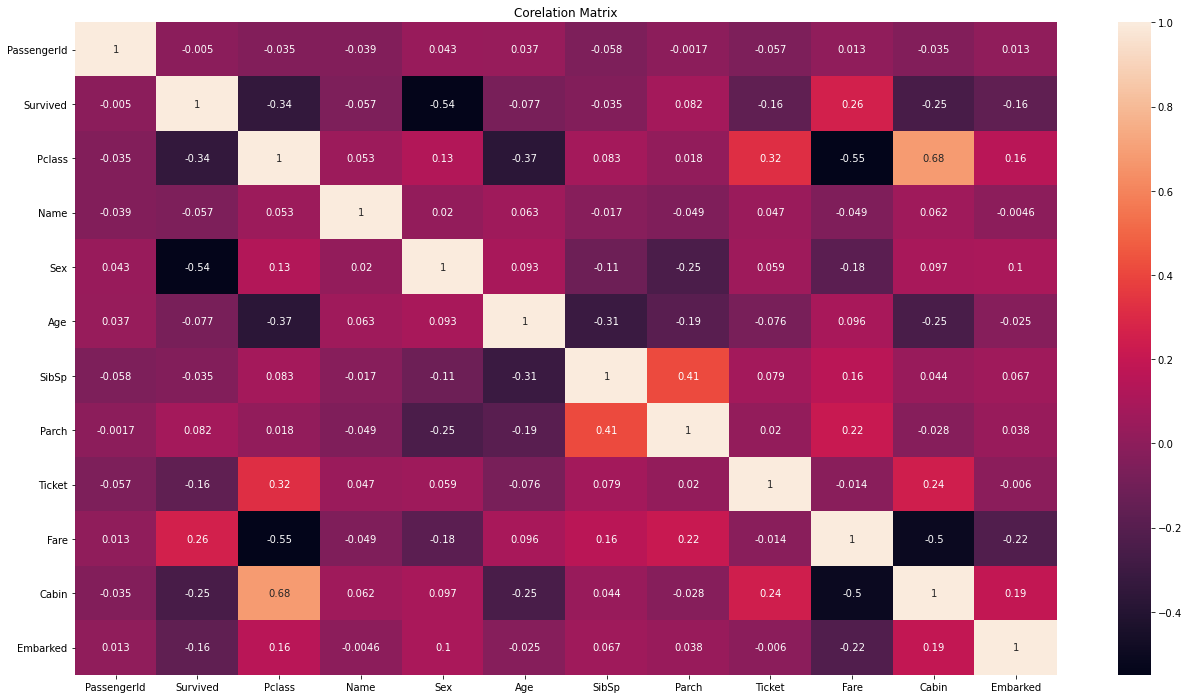

In [21]:
corr_mat=df.corr()
plt.figure(figsize=[22,12])
sns.heatmap(corr_mat,annot=True)
plt.title('Corelation Matrix')
plt.show()

# Now cheaking skewnes

In [23]:
x=df1.drop('Survived',axis=1)
y=df1['Survived']

In [24]:
x.skew()

PassengerId    0.000000
Pclass        -0.630548
Name           0.000000
Sex           -0.618921
Age            0.262862
SibSp          3.695352
Parch          2.749117
Ticket         0.000246
Fare           4.787317
Cabin         -2.167313
Embarked      -1.246689
dtype: float64

skewness is present in few columns

In [28]:
from sklearn.preprocessing import power_transform
df_new=power_transform(x)

df_new=pd.DataFrame(df_new,columns=x.columns)

In [29]:
df_new.skew()

PassengerId   -0.283201
Pclass        -0.441438
Name          -0.288132
Sex           -0.618921
Age           -0.399237
SibSp          0.808608
Parch          1.228795
Ticket        -0.299695
Fare          -0.040329
Cabin         -1.602847
Embarked      -0.861651
dtype: float64

Now skewness is removed in df_new

In [30]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.73010796, 0.78927234, 0.82737724, ..., 0.50244517, 0.45150219,
        0.58111394],
       [1.72622007, 1.2669898 , 1.56610693, ..., 0.78684529, 1.38162664,
        1.93846038],
       [1.72233219, 1.2669898 , 0.82737724, ..., 0.48885426, 0.45150219,
        0.58111394],
       ...,
       [1.72233219, 0.78927234, 0.82737724, ..., 0.17626324, 0.45150219,
        0.58111394],
       [1.72622007, 1.2669898 , 1.56610693, ..., 0.04438104, 1.9648949 ,
        1.93846038],
       [1.73010796, 0.78927234, 0.82737724, ..., 0.49237783, 0.45150219,
        0.67867322]])

In [31]:
threshold=3
print(np.where(z>3))

(array([ 13,  16,  23,  25,  27,  50,  59,  61,  68,  71,  86,  88,  96,
       118, 119, 159, 164, 167, 170, 171, 174, 180, 182, 185, 201, 209,
       233, 258, 261, 266, 278, 284, 299, 311, 324, 329, 341, 360, 377,
       380, 386, 437, 438, 438, 445, 475, 480, 523, 527, 540, 541, 542,
       556, 557, 567, 583, 599, 610, 630, 638, 647, 678, 679, 683, 686,
       689, 690, 700, 716, 730, 736, 737, 737, 742, 745, 774, 779, 779,
       781, 787, 792, 806, 813, 815, 824, 829, 846, 850, 858, 863, 867,
       885], dtype=int64), array([ 7,  6, 10,  7,  9,  6,  6, 10,  6,  6,  7,  9, 10,  9,  6,  6,  6,
        7, 10,  6, 10,  6,  6, 10,  6, 10,  6,  9,  6,  6,  6, 10,  9,  9,
        6, 10,  9,  7,  9,  9,  6,  7,  7,  9, 10, 10,  6, 10,  9, 10,  6,
        6, 10,  9,  7, 10, 10,  7, 10,  7, 10,  7,  9,  6,  6,  9, 10,  9,
        9,  9,  7,  9, 10,  9, 10,  7,  9, 10, 10,  6,  6, 10,  6, 10,  6,
       10,  6,  6,  7,  6, 10,  7], dtype=int64))


# Now cheaking best accureacy score

In [34]:
from sklearn.linear_model import LogisticRegression
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.30,random_state=i)
    lr = LogisticRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        print('Best accuracy is',maxAccu,'on Random state',maxRS)


Best accuracy is 0.7388059701492538 on Random state 1
Best accuracy is 0.7649253731343284 on Random state 2
Best accuracy is 0.8283582089552238 on Random state 4


In [35]:
train, x_test, y_train, y_test=train_test_split(x,y,test_size=.30,random_state=4)

In [36]:
model=[DecisionTreeClassifier(),SVC(),KNeighborsClassifier(),MultinomialNB()]

In [37]:
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of',m,'is')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print("\n")

Accuracy score of DecisionTreeClassifier() is
0.5149253731343284
[[101  77]
 [ 53  37]]
              precision    recall  f1-score   support

           0       0.66      0.57      0.61       178
           1       0.32      0.41      0.36        90

    accuracy                           0.51       268
   macro avg       0.49      0.49      0.49       268
weighted avg       0.54      0.51      0.53       268



Accuracy score of SVC() is
0.664179104477612
[[178   0]
 [ 90   0]]
              precision    recall  f1-score   support

           0       0.66      1.00      0.80       178
           1       0.00      0.00      0.00        90

    accuracy                           0.66       268
   macro avg       0.33      0.50      0.40       268
weighted avg       0.44      0.66      0.53       268



Accuracy score of KNeighborsClassifier() is
0.5373134328358209
[[113  65]
 [ 59  31]]
              precision    recall  f1-score   support

           0       0.66      0.63      0.65  

In [40]:
sv=SVC()
sv.fit(x_train,y_train)
sv.score(x_train,y_train)
predsv=sv.predict(x_test)
print(accuracy_score(y_test,predsv))
print(confusion_matrix(y_test,predsv))
      

0.664179104477612
[[178   0]
 [ 90   0]]


In [41]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.5373134328358209
[[113  65]
 [ 59  31]]
              precision    recall  f1-score   support

           0       0.66      0.63      0.65       178
           1       0.32      0.34      0.33        90

    accuracy                           0.54       268
   macro avg       0.49      0.49      0.49       268
weighted avg       0.54      0.54      0.54       268



In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.68      0.71      0.69       178
           1       0.36      0.32      0.34        90

    accuracy                           0.58       268
   macro avg       0.52      0.52      0.52       268
weighted avg       0.57      0.58      0.58       268



In [43]:
predlr=lr.predict(x_test)
from sklearn.model_selection import cross_val_score
Iss = accuracy_score(y_test,predlr)
for j in range(2,10):
    Isscore = cross_val_score(lr,x,y,cv=j)
    Isc=Isscore.mean()
    print("At cv:-",j)
    print("cross validation score is:-",Isc*100)
    print("accuracy_score is :-",Iss*100)
    print("\n")
    


At cv:- 2
cross validation score is:- 75.19851866780873
accuracy_score is :- 80.97014925373134


At cv:- 3
cross validation score is:- 77.21661054994388
accuracy_score is :- 80.97014925373134


At cv:- 4
cross validation score is:- 77.10782531410334
accuracy_score is :- 80.97014925373134


At cv:- 5
cross validation score is:- 77.44523256543846
accuracy_score is :- 80.97014925373134


At cv:- 6
cross validation score is:- 77.66642481407582
accuracy_score is :- 80.97014925373134


At cv:- 7
cross validation score is:- 77.10735376827897
accuracy_score is :- 80.97014925373134


At cv:- 8
cross validation score is:- 77.32967342342343
accuracy_score is :- 80.97014925373134


At cv:- 9
cross validation score is:- 77.32884399551065
accuracy_score is :- 80.97014925373134




In [46]:
Isscore_selected = cross_val_score(lr,x,y,cv=6).mean()
print("The cv score is: ",Isscore_selected,'\nThe accuracy score is: ',Iss)

The cv score is:  0.7766642481407583 
The accuracy score is:  0.8097014925373134


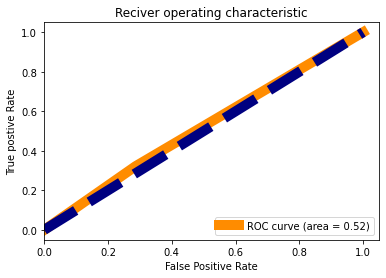

In [47]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds=roc_curve(y_test,pred)
roc_auc = auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr, color='darkorange', lw=10,label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1],[0, 1], color="navy",lw=10, linestyle="--")
plt.xlim([0.0, 1.0])
plt.xlim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True postive Rate")
plt.title("Reciver operating characteristic")
plt.legend(loc="lower right")
plt.show()